**Banknote Authentication Classification:**

This is a practice program to emulate the following a tutorial on machinelearningmastery.com for a disparate data set than the one given in the blog post.

Data Set Used: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data Set Attributes:
1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

This is the blogpost by Jason Brownlee on machinelearningmastery: https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

Most of the steps are the same as the one given on the blogpost.

In [1]:
#load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/usr/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#Load dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
#WTI - Wavelet Transformed Image
names = ['variance-wti','skewness-wti','curtosis-wti','entropy-image','class']
dataset = pandas.read_csv(url, names=names)

In [3]:
#shape
print(dataset.shape)

(1372, 5)


In [4]:
#head
print(dataset.head(20))

    variance-wti  skewness-wti  curtosis-wti  entropy-image  class
0        3.62160        8.6661      -2.80730       -0.44699      0
1        4.54590        8.1674      -2.45860       -1.46210      0
2        3.86600       -2.6383       1.92420        0.10645      0
3        3.45660        9.5228      -4.01120       -3.59440      0
4        0.32924       -4.4552       4.57180       -0.98880      0
5        4.36840        9.6718      -3.96060       -3.16250      0
6        3.59120        3.0129       0.72888        0.56421      0
7        2.09220       -6.8100       8.46360       -0.60216      0
8        3.20320        5.7588      -0.75345       -0.61251      0
9        1.53560        9.1772      -2.27180       -0.73535      0
10       1.22470        8.7779      -2.21350       -0.80647      0
11       3.98990       -2.7066       2.39460        0.86291      0
12       1.89930        7.6625       0.15394       -3.11080      0
13      -1.57680       10.8430       2.54620       -2.93620   

In [5]:
#descriptions
print(dataset.describe())

       variance-wti  skewness-wti  curtosis-wti  entropy-image        class
count   1372.000000   1372.000000   1372.000000    1372.000000  1372.000000
mean       0.433735      1.922353      1.397627      -1.191657     0.444606
std        2.842763      5.869047      4.310030       2.101013     0.497103
min       -7.042100    -13.773100     -5.286100      -8.548200     0.000000
25%       -1.773000     -1.708200     -1.574975      -2.413450     0.000000
50%        0.496180      2.319650      0.616630      -0.586650     0.000000
75%        2.821475      6.814625      3.179250       0.394810     1.000000
max        6.824800     12.951600     17.927400       2.449500     1.000000


In [6]:
#class distribution
print(dataset.groupby('class').size())

class
0    762
1    610
dtype: int64


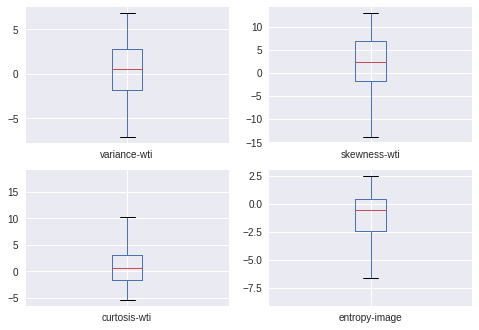

In [14]:
# box and whisker plots
dataset[dataset.columns[0:4]].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

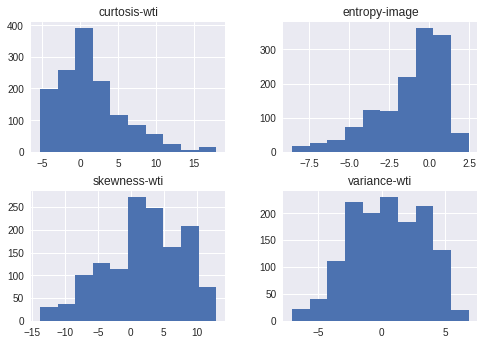

In [16]:
# histograms
dataset[dataset.columns[0:4]].hist()
plt.show()

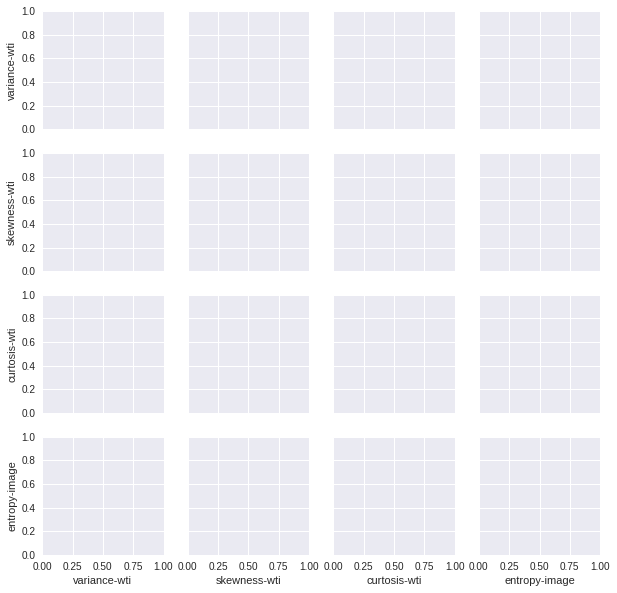

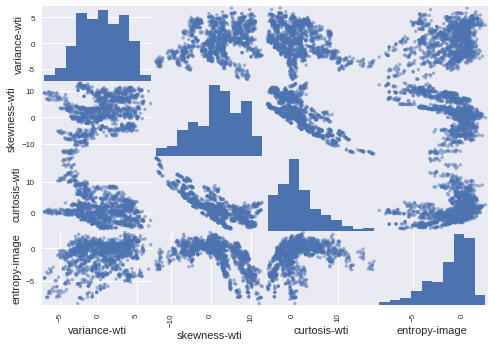

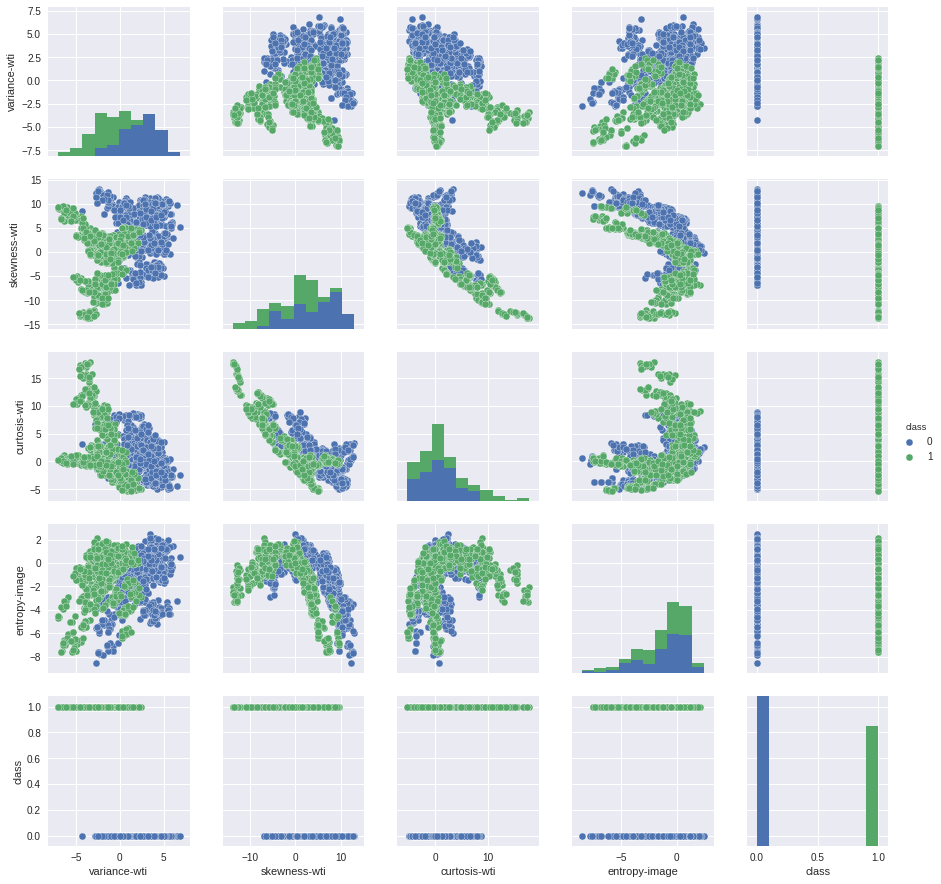

In [18]:
# scatter plot matrix
scatter_matrix(dataset[dataset.columns[0:4]])
plt.show()

sb.pairplot(dataset.dropna(), hue='class')
sb.plt.show()

In [19]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [20]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [21]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.991802 (0.006366)
LDA: 0.976264 (0.013118)
KNN: 1.000000 (0.000000)
CART: 0.982652 (0.013889)
NB: 0.841318 (0.049469)
SVM: 1.000000 (0.000000)


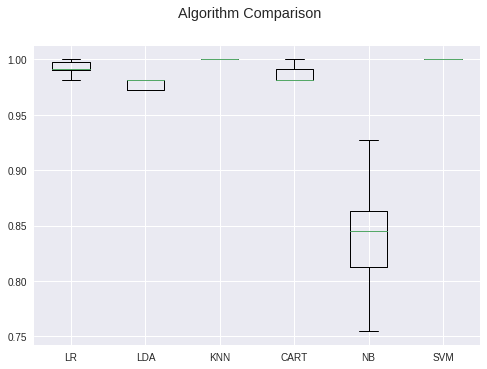

In [22]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Make predictions on validation dataset using SVC
svc = SVC()
svc.fit(X_train, Y_train)
predictions = svc.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[158   0]
 [  0 117]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       158
        1.0       1.00      1.00      1.00       117

avg / total       1.00      1.00      1.00       275



In [24]:
# Make predictions on validation dataset using KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[158   0]
 [  0 117]]
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       158
        1.0       1.00      1.00      1.00       117

avg / total       1.00      1.00      1.00       275

